In [228]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
import cv2
import numpy as np

#Import image
impatch = "Tol4-1 high.tiff"
im = Image.open(impatch)

#Set to array
imarray = np.array(im)

(1024, 1024, 3)


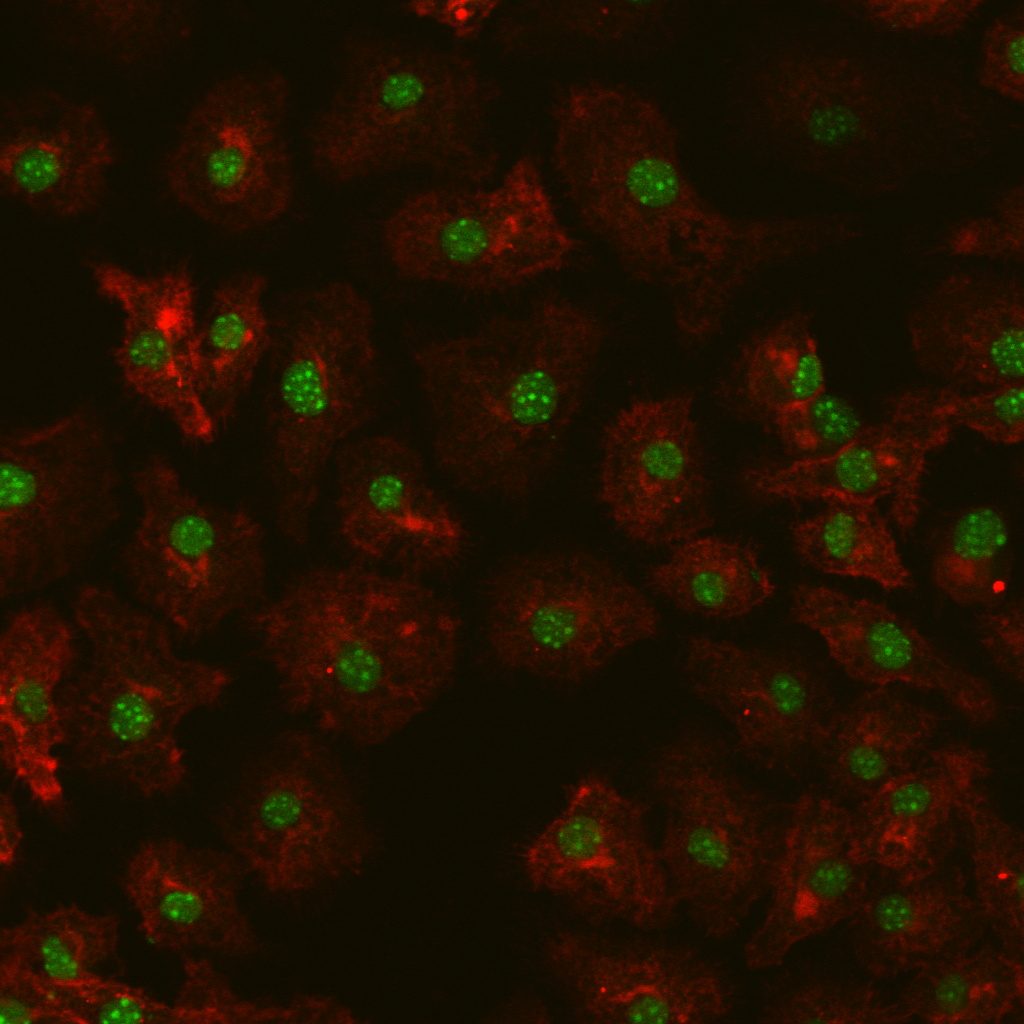

In [229]:
#Show array shape&image
print(imarray.shape)
Image.fromarray(imarray)

(55941,)
65.41690352335496
3659487
(1024, 2050, 3)


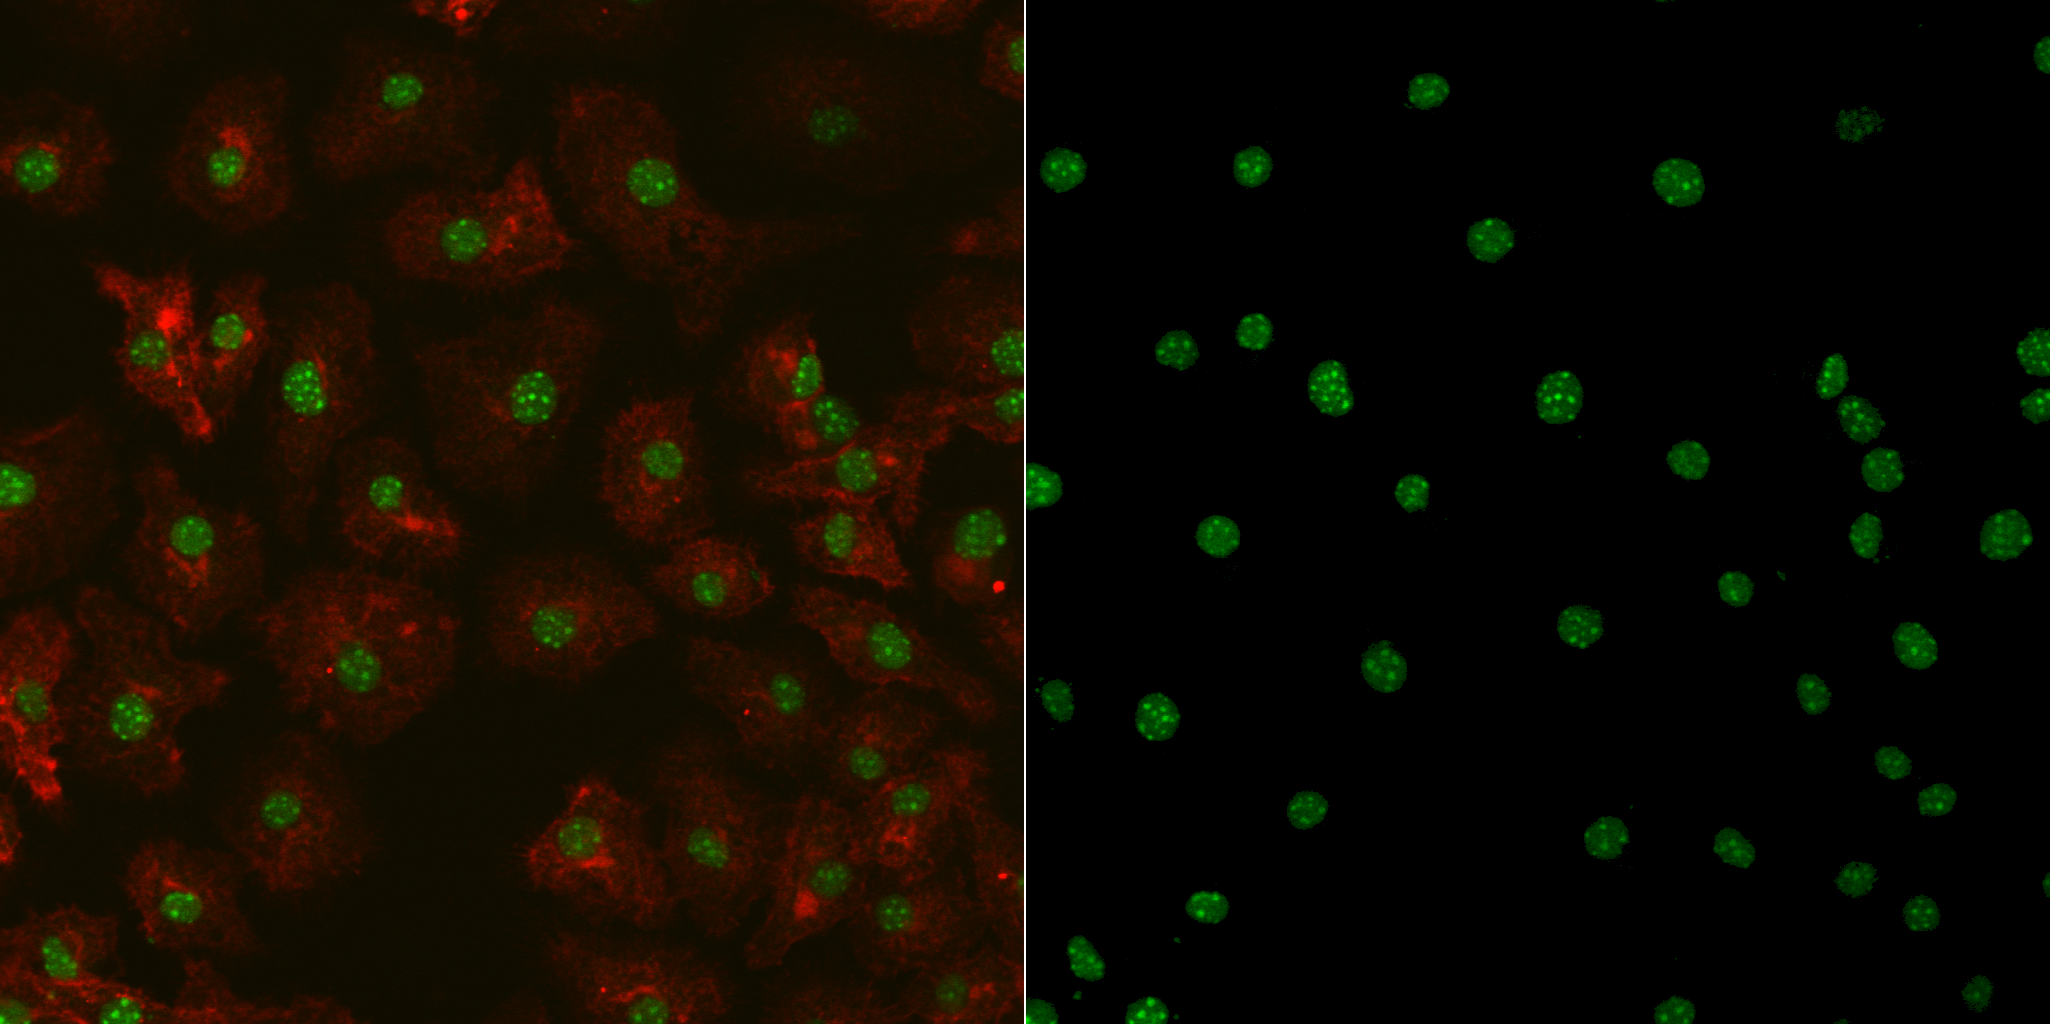

In [230]:
#Delete R B color
gimarray = imarray.copy()
gimarray[:, :, 0] = 0
gimarray[:, :, 2] = 0

#Fillter noise
gimarray[gimarray < 30] = 0

#Split G color array
gareaimarray = gimarray[:, :, 1]
cvgareaimarray = gareaimarray.copy() #Bufer for cv process
cvgareaimarray[cvgareaimarray > 0] = 100 #Set to plain gray scale

#Calculate intentsive of green area
gareaimarray = gareaimarray[gareaimarray > 0]
print(gareaimarray.shape)
print(gareaimarray.mean())
print(gareaimarray.sum())

#combine 2 image
imarray = np.concatenate((imarray, np.full((1024, 2, 3), 255, dtype="uint8"), gimarray), axis=1)
print(imarray.shape)
Image.fromarray(imarray)

In [231]:
#Draw text in photo
Finalim = Image.fromarray(imarray)
draw = ImageDraw.Draw(Finalim)
font = ImageFont.truetype('Montserrat-Black.ttf', 40)
draw.text((5, 5), str(gareaimarray.mean().round(2)), (255,255,255), font=font)

#Save image
Finalim.save("Split" + impatch[:-5] + ".jpg")

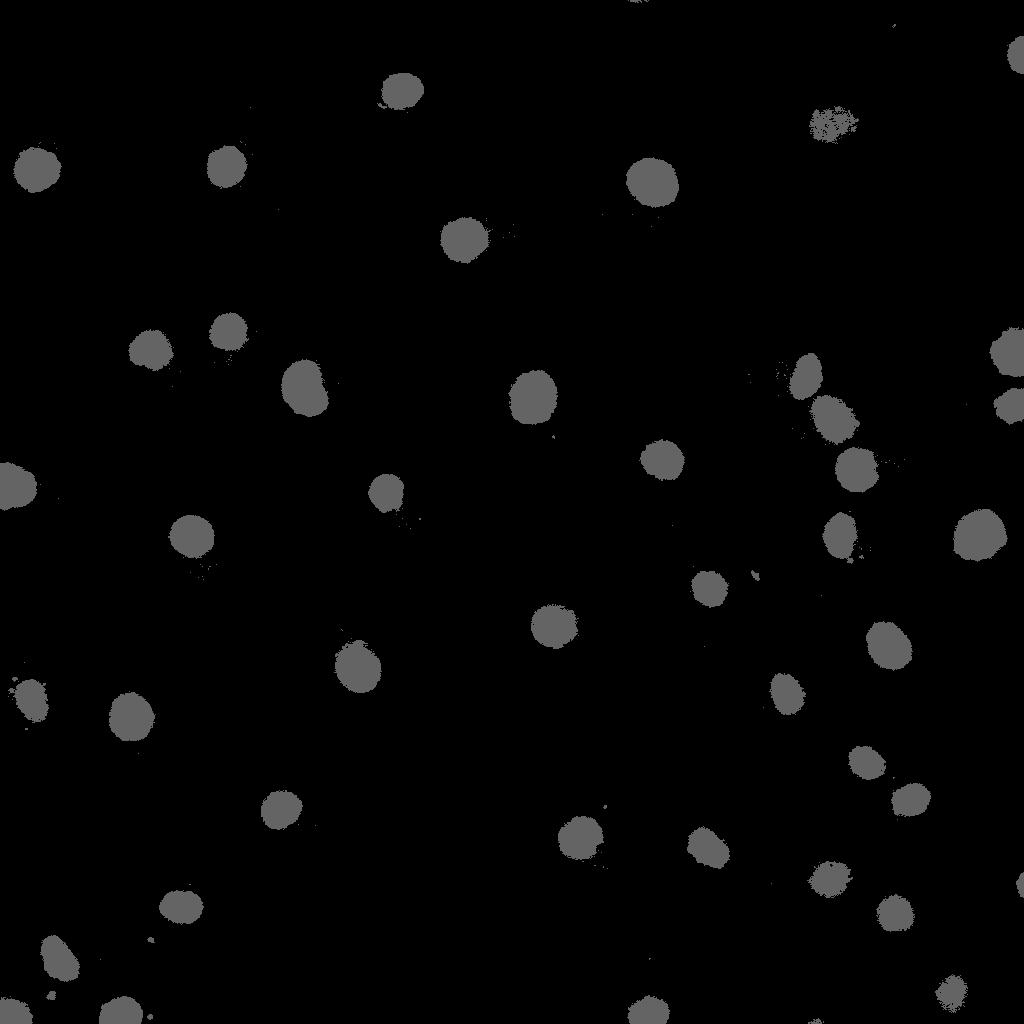

In [232]:
Image.fromarray(cvgareaimarray)

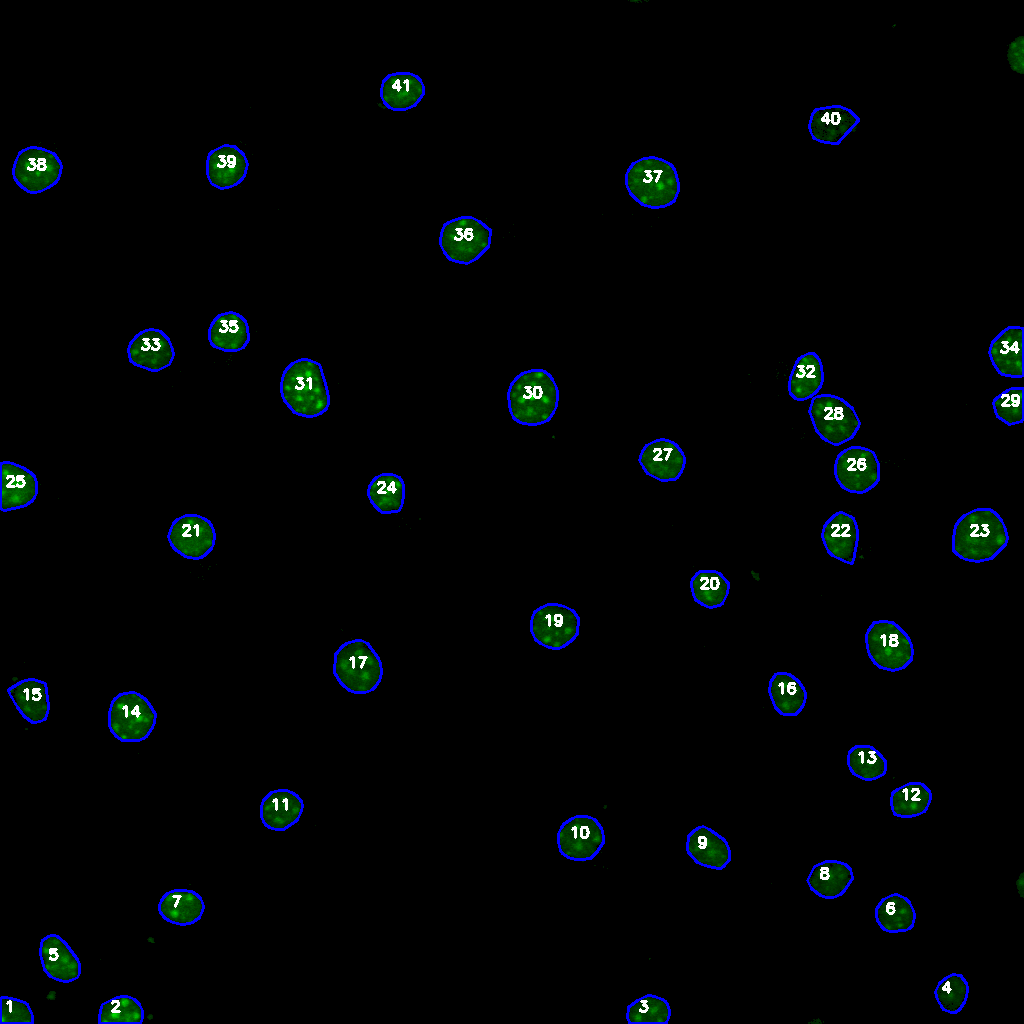

In [233]:
#edged = cv2.Canny(cvgareaimarray, 30, 200)

_, contours, _ = cv2.findContours(cvgareaimarray, 
                                  cv2.RETR_EXTERNAL, 
                                  cv2.CHAIN_APPROX_SIMPLE)


i = 0
for c in contours:
       
    if cv2.contourArea(c) > 500:
        i = i + 1
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    
        hull = cv2.convexHull(c)
        cv2.drawContours(gimarray, [hull], 0, (0, 0, 255), 2)
        
        cv2.putText(gimarray, str(i), (cX - 10, cY), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    
Image.fromarray(gimarray)


19
[[[856.5 469.5  22.1]
  [225.5 166.5  20.2]
  [360.5 666.5  25.7]
  [387.5 492.5  18.5]
  [463.5 236.5  25. ]
  [830.5 119.5  19.1]
  [184.5 906.5  17.1]
  [ 32.5 170.5  19.4]
  [281.5 807.5  18.2]
  [189.5 538.5  24.3]
  [ 31.5 699.5  20.2]
  [583.5 834.5  18.8]
  [403.5  89.5  18.2]
  [ 60.5 960.5  18.3]
  [806.5 382.5  18. ]
  [652.5 186.5  20.4]
  [548.5 625.5  19.1]
  [784.5 685.5  14. ]
  [898.5 647.5  13. ]]]


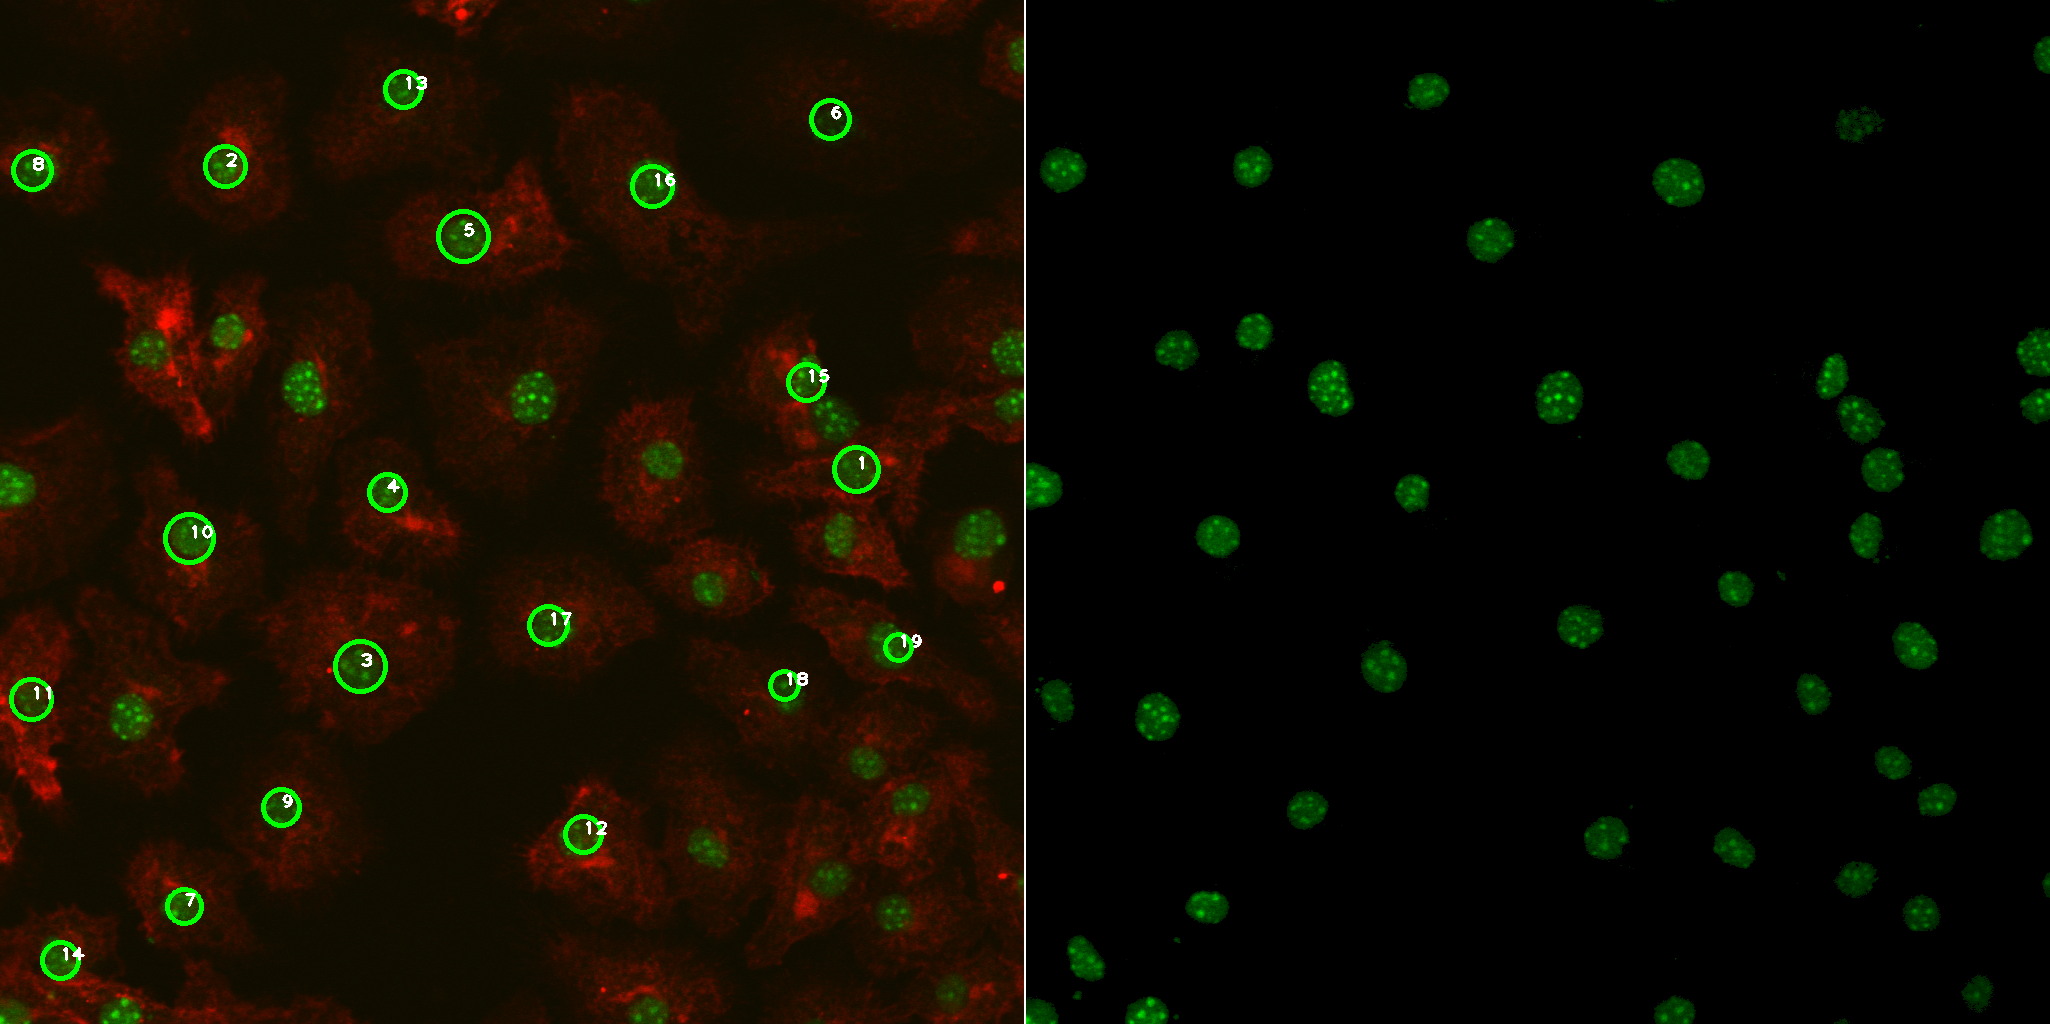

In [234]:
circles = cv2.HoughCircles(cvgareaimarray,
                           cv2.HOUGH_GRADIENT,
                           minDist=35,
                           dp=1,
                           param1=150,
                           param2=12,
                           minRadius=12,
                           maxRadius=30)
print(circles.shape[1])
print(circles)

i = 0
for (x, y, r) in circles[0, :, :]:
    i = i + 1
    cv2.circle(imarray, (x, y), r, (0, 255, 0), 4)
    cv2.putText(imarray,str(i), (x,y), cv2.FONT_HERSHEY_PLAIN, fontScale=1.2,
                color=(255, 255, 255), thickness=2)
    
Image.fromarray(imarray)